# First model of energy price time series

## 0.0 import modules and data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [5]:
# data import
path = '/home/adam/code/hramzan01/market/raw_data/ACORN_A_processed.csv'
data = pd.read_csv(path)

# 1.0 Preliminary data plot

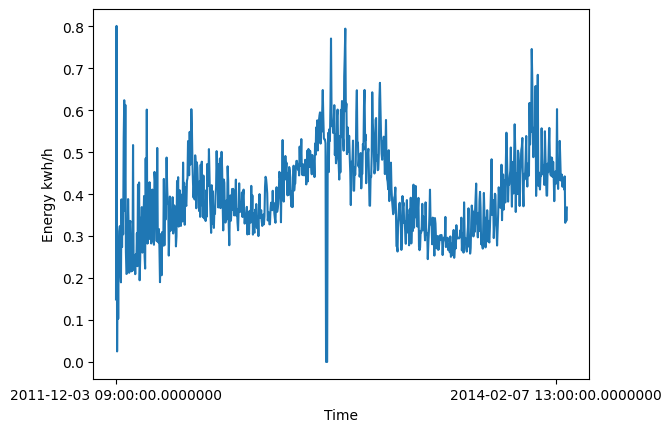

In [6]:
df_A_sampled = data.iloc[::48, :]
plt.plot(df_A_sampled['date'], df_A_sampled['Average energy(kWh/hh)'])
plt.xlabel('Time')
plt.ylabel('Energy kwh/h')
plt.xticks([df_A_sampled['date'][0],df_A_sampled['date'][800*48]]);

# 2.0 Prophet modelling

### Put data into the right format

In [7]:
data

,Unnamed: 0,date,Average energy(kWh/hh)
0,0,2011-12-03 09:00:00.0000000,0.149000
1,1,2011-12-03 09:30:00.0000000,0.154000
2,2,2011-12-03 10:00:00.0000000,0.768000
3,3,2011-12-03 10:30:00.0000000,1.179000
4,4,2011-12-03 11:00:00.0000000,0.588000
...,...,...,...
39378,39378,2014-02-27 22:00:00.0000000,0.594135
39379,39379,2014-02-27 22:30:00.0000000,0.563442
39380,39380,2014-02-27 23:00:00.0000000,0.510795
39381,39381,2014-02-27 23:30:00.0000000,0.408642


In [8]:
data = data.drop(columns=['Unnamed: 0'])
data

,date,Average energy(kWh/hh)
0,2011-12-03 09:00:00.0000000,0.149000
1,2011-12-03 09:30:00.0000000,0.154000
2,2011-12-03 10:00:00.0000000,0.768000
3,2011-12-03 10:30:00.0000000,1.179000
4,2011-12-03 11:00:00.0000000,0.588000
...,...,...
39378,2014-02-27 22:00:00.0000000,0.594135
39379,2014-02-27 22:30:00.0000000,0.563442
39380,2014-02-27 23:00:00.0000000,0.510795
39381,2014-02-27 23:30:00.0000000,0.408642


In [9]:
data['date'] = data['date'].apply(lambda x: x[:19])

In [10]:
date_format = '%Y-%m-%d %H:%M:%S'
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, date_format))

In [11]:
data

,date,Average energy(kWh/hh)
0,2011-12-03 09:00:00,0.149000
1,2011-12-03 09:30:00,0.154000
2,2011-12-03 10:00:00,0.768000
3,2011-12-03 10:30:00,1.179000
4,2011-12-03 11:00:00,0.588000
...,...,...
39378,2014-02-27 22:00:00,0.594135
39379,2014-02-27 22:30:00,0.563442
39380,2014-02-27 23:00:00,0.510795
39381,2014-02-27 23:30:00,0.408642


In [12]:
data = data.rename(columns = {'date':'ds','Average energy(kWh/hh)':'y'})
data

,ds,y
0,2011-12-03 09:00:00,0.149000
1,2011-12-03 09:30:00,0.154000
2,2011-12-03 10:00:00,0.768000
3,2011-12-03 10:30:00,1.179000
4,2011-12-03 11:00:00,0.588000
...,...,...
39378,2014-02-27 22:00:00,0.594135
39379,2014-02-27 22:30:00,0.563442
39380,2014-02-27 23:00:00,0.510795
39381,2014-02-27 23:30:00,0.408642


## Using facebook Prophet

In [13]:
n_train = round(0.8 * len(data),0)
n_train = int(n_train)
n_train

31506

In [14]:
n_test = len(data) - n_train
n_test

7877

In [15]:
X_train = data.iloc[:n_train]
X_test = data.iloc[n_train:]

In [16]:
m = Prophet()
m.fit(X_train)

20:04:51 - cmdstanpy - INFO - Chain [1] start processing
20:05:32 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
future = m.make_future_dataframe(periods=7*24, freq='h')

In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2011-12-03 09:00:00,0.298336,0.194115,0.400322
1,2011-12-03 09:30:00,0.301492,0.191677,0.409919
2,2011-12-03 10:00:00,0.301375,0.193779,0.410713
3,2011-12-03 10:30:00,0.299383,0.188857,0.408310
4,2011-12-03 11:00:00,0.296580,0.186108,0.409932
...,...,...,...,...
31669,2013-09-23 18:00:00,0.452359,0.355246,0.563630
31670,2013-09-23 19:00:00,0.515271,0.403904,0.623676
31671,2013-09-23 20:00:00,0.534044,0.429372,0.643326
31672,2013-09-23 21:00:00,0.497029,0.387453,0.595407


/home/adam/.pyenv/versions/3.10.6/envs/market/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/adam/.pyenv/versions/3.10.6/envs/market/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


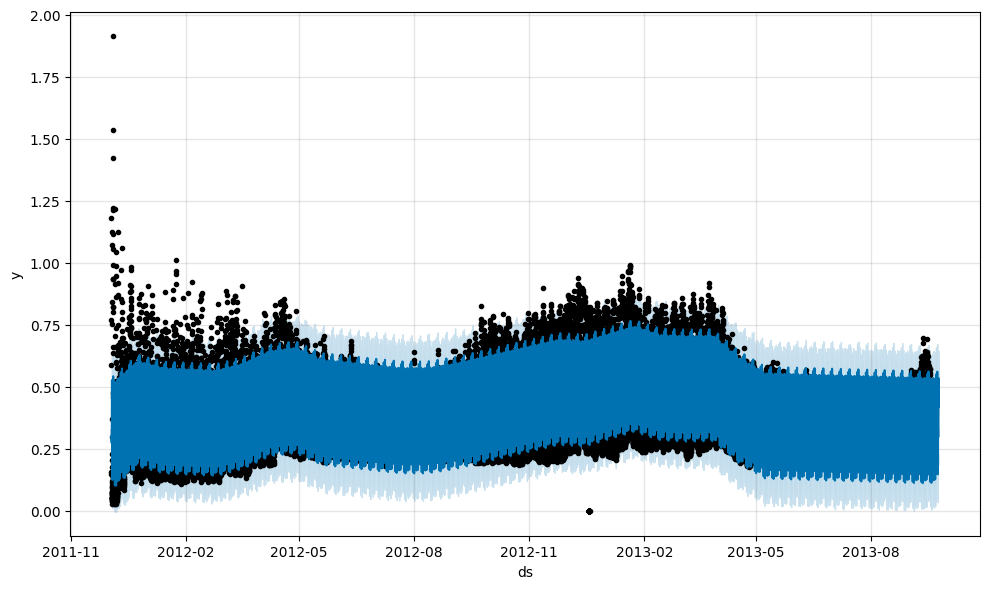

In [39]:
fig1 = m.plot(forecast)

/home/adam/.pyenv/versions/3.10.6/envs/market/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/adam/.pyenv/versions/3.10.6/envs/market/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/adam/.pyenv/versions/3.10.6/envs/market/lib/python3.10/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a

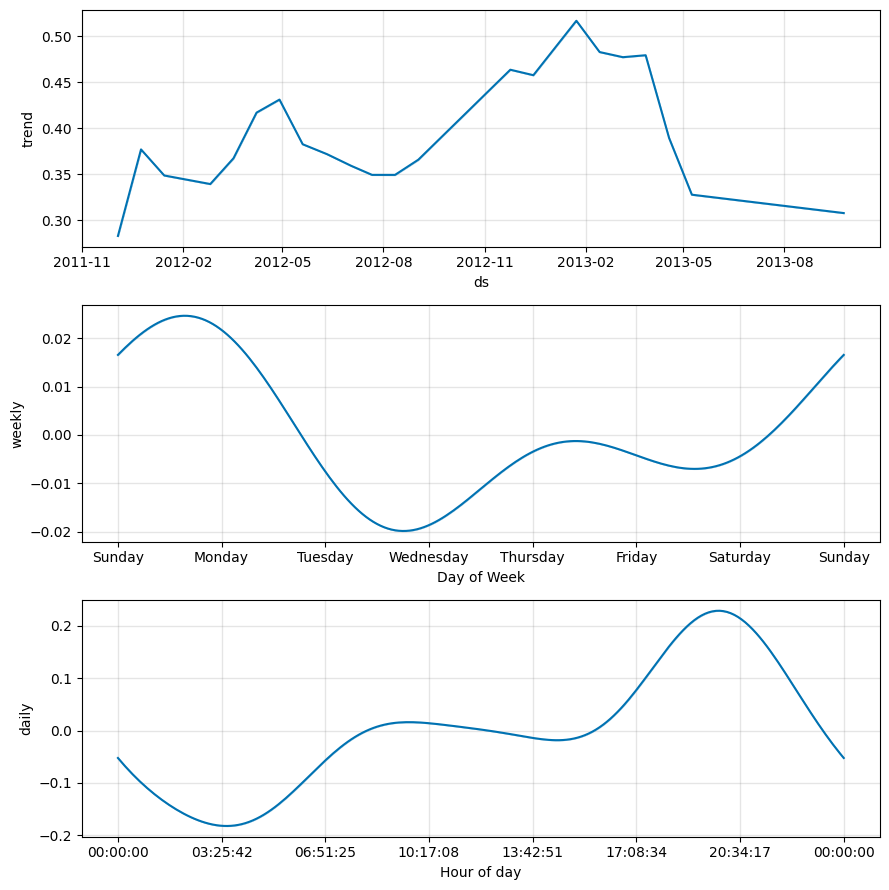

In [40]:
fig2 = m.plot_components(forecast)

### Cross validation of prophet

# We only need to predict 1 week in advance

In [66]:
df_cv = cross_validation(m, initial='365 days', period='60 days', horizon = '7 days')

  0%|          | 0/5 [00:00<?, ?it/s]20:32:34 - cmdstanpy - INFO - Chain [1] start processing
20:32:53 - cmdstanpy - INFO - Chain [1] done processing
 20%|██        | 1/5 [00:19<01:19, 19.99s/it]20:32:54 - cmdstanpy - INFO - Chain [1] start processing
20:33:12 - cmdstanpy - INFO - Chain [1] done processing
 40%|████      | 2/5 [00:39<00:58, 19.51s/it]20:33:13 - cmdstanpy - INFO - Chain [1] start processing
20:33:49 - cmdstanpy - INFO - Chain [1] done processing
 60%|██████    | 3/5 [01:16<00:55, 27.68s/it]20:33:51 - cmdstanpy - INFO - Chain [1] start processing
20:34:27 - cmdstanpy - INFO - Chain [1] done processing
 80%|████████  | 4/5 [01:53<00:31, 31.43s/it]20:34:29 - cmdstanpy - INFO - Chain [1] start processing
20:35:03 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 5/5 [02:30<00:00, 30.13s/it]


In [67]:
df_p = performance_metrics(df_cv)
df_p.iloc[100:110]

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
100,2 days 19:00:00,0.003667,0.060554,0.049417,0.156904,0.126103,0.170603,0.934524
101,2 days 19:30:00,0.003784,0.061514,0.050412,0.157283,0.123106,0.171089,0.928571
102,2 days 20:00:00,0.003972,0.063023,0.051596,0.156585,0.121337,0.170534,0.922619
103,2 days 20:30:00,0.004243,0.065139,0.052881,0.154898,0.119293,0.168905,0.910714
104,2 days 21:00:00,0.004421,0.066493,0.053963,0.152519,0.117515,0.165926,0.898810
105,2 days 21:30:00,0.004600,0.067823,0.055128,0.149700,0.117174,0.161885,0.892857
106,2 days 22:00:00,0.004705,0.068593,0.055940,0.145894,0.117174,0.156309,0.892857
107,2 days 22:30:00,0.004794,0.069237,0.056698,0.141579,0.117515,0.150142,0.892857
108,2 days 23:00:00,0.004896,0.069971,0.057311,0.136780,0.117515,0.143807,0.880952
109,2 days 23:30:00,0.004867,0.069761,0.056894,0.130536,0.116833,0.136364,0.880952


In [68]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-01-12 22:30:00,0.586959,0.461398,0.714717,0.609078,2013-01-12 22:00:00
1,2013-01-12 23:00:00,0.545651,0.424630,0.672063,0.574316,2013-01-12 22:00:00
2,2013-01-12 23:30:00,0.506957,0.386011,0.625928,0.539578,2013-01-12 22:00:00
3,2013-01-13 00:00:00,0.471711,0.348843,0.590676,0.438525,2013-01-12 22:00:00
4,2013-01-13 00:30:00,0.439960,0.317520,0.559651,0.377270,2013-01-12 22:00:00
...,...,...,...,...,...,...
1675,2013-09-16 20:00:00,0.521024,0.421579,0.625567,0.570621,2013-09-09 22:00:00
1676,2013-09-16 20:30:00,0.509291,0.403668,0.617889,0.553409,2013-09-09 22:00:00
1677,2013-09-16 21:00:00,0.484360,0.379787,0.596713,0.514470,2013-09-09 22:00:00
1678,2013-09-16 21:30:00,0.448876,0.346274,0.564924,0.484233,2013-09-09 22:00:00


In [69]:
df_p['horizon'] = df_p['horizon'].apply(lambda x: x.total_seconds()/3600)

Text(0, 0.5, 'MAE')

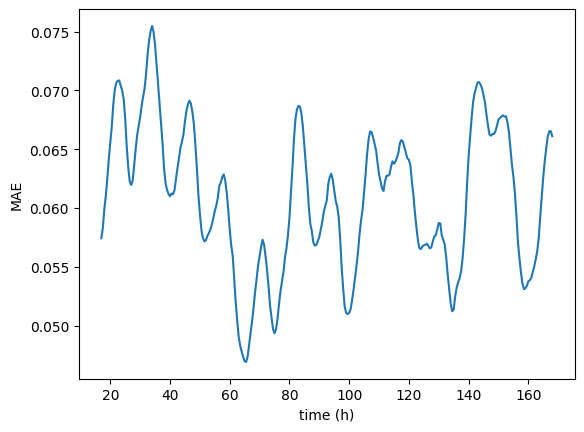

In [70]:
plt.plot(df_p['horizon'],df_p['mae'])
plt.xlabel('time (h)')
plt.ylabel('MAE')

Consluion: Low MAE for predicting energy consumption for the following 7 days

Facebook Prophet model seems viable

Next test on a larger data set

Could increase the training set above one year but one year seems viable for prediction